In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import medfilt
%matplotlib inline

In [2]:
def regresion(x_array, y_array, order, n=100, min_point=0):
    """
        Returns: array of regresion values
    """
    coeff = np.polyfit(x_array, y_array, order)
    x = np.linspace(min_point, max(x_array)*1.1, n)
    y = np.zeros_like(x)
    for i in range(order+1):
        y += coeff[i]*x**(order-i)
    return x, y, coeff

def equation_text(coefficients, variable):
    """
        Returns: the equation of regresion as text
    """
    text = []
    
    i = len(coefficients)-1
    for (j, cons) in enumerate(coefficients):
        if j == i:
            text.append("$%.3f$"%cons)
        elif i-j == 1:
            text.append("$%.3f$"%(cons) + variable)
        else:            
            text.append("$%.3f$"%cons + variable+"$^%d$"%(i-j))
    
    text = "$+$".join(text)
    return text

In [3]:
temperature_voltage = np.genfromtxt("voltage_calibration.csv", delimiter = ";")
temperature_temperature = np.genfromtxt("temperature_calibration.csv", delimiter = ";")

until = 100
our_temperature = temperature_temperature[1:until,1]
reference_temperature = temperature_temperature[1:until,2]

temperature = temperature_voltage[1:,1]
voltage = temperature_voltage[1:,2]

from_ = 1000
temperature_warming = temperature[from_:]
voltage_warming = voltage[from_:]

# Temperature calibration

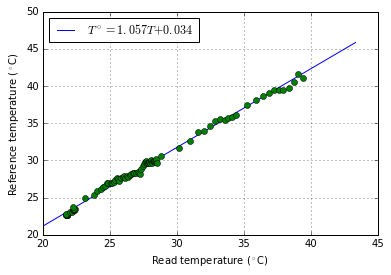

In [4]:
x, y, coeff = regresion(our_temperature, reference_temperature, 1, min_point=20)    
text = equation_text(coeff, "$T$")
plt.plot(x, y, "-", label="$T^\circ=$"+text)
    
plt.plot(our_temperature, reference_temperature, "o")
plt.ylabel("Reference temperature ($^\circ$C)")
plt.xlabel("Read temperature ($^\circ$C)")
plt.legend(loc='upper left')
plt.grid()
plt.show()

# Temperature as a function of voltage

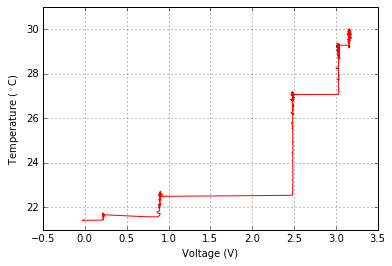

In [5]:
plt.plot(voltage_warming, temperature_warming, "-", c="r")

plt.xlabel("Voltage (V)")
plt.ylabel("Temperature ($^\circ$C)")
plt.grid(True)
plt.show()

## Filtering and data extraction

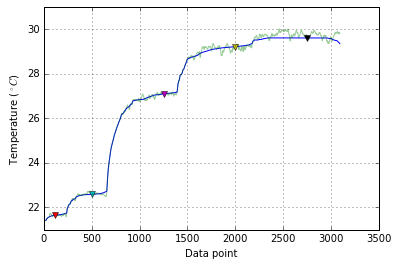

In [6]:
temperature_warming_filtered = medfilt(temperature_warming, kernel_size=1501)

plt.plot(temperature_warming_filtered)
plt.plot(temperature_warming, alpha = 0.4)

steps = [120, 500, 1250, 2000, 2750]
t = np.zeros(len(steps))
v = np.zeros_like(t)

i = 0
for value in steps:
    plt.plot(value, temperature_warming_filtered[value], "v")
    v[i] = voltage_warming[value]
    t[i] = temperature_warming_filtered[value]
    i += 1
    
plt.grid(True)
plt.ylabel("Temperature ($^\circ C$)")
plt.xlabel("Data point")
plt.show()

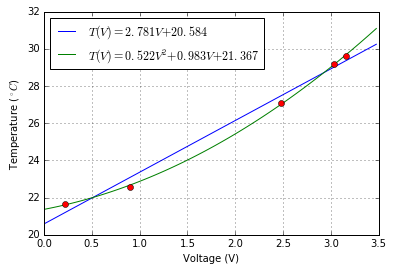

In [7]:
for i in range(1,3):
    x, y, coeff = regresion(v, t, i)    
    text = equation_text(coeff, "$V$")
    plt.plot(x, y, "-", label="$T(V)=$"+text)

plt.plot(v, t, "o")
plt.ylabel("Temperature ($^\circ C$)")
plt.xlabel("Voltage (V)")
plt.grid(True)
plt.legend(loc = "upper left")
plt.show()